## Stock Market Prediction And Forecasting Using Stacked LSTM

Importing basic data science library 

In [67]:
import pandas as pn
import matplotlib.pyplot as mat
import numpy as ny
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Importing the datset

In [68]:
sd=pn.read_csv('/content/New Text Document (2).csv')

Importing basic data science library 

Checking the dateset

In [69]:
sd.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [70]:
sd.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [71]:
sd.shape

(2035, 8)

In [72]:
sd.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [73]:
sd1=sd.reset_index()['Close']

In [74]:
sd1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [75]:
sd1.shape

(2035,)

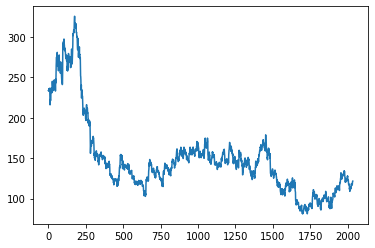

In [76]:
mat.plot(sd1)

using scaler to reduce the scale of the dataset to save solver timer

In [77]:
scaler = MinMaxScaler(feature_range = (0,1))
sd1 = scaler.fit_transform(ny.array(sd1).reshape(-1,1))

In [78]:
sd1.shape

(2035, 1)

In [79]:
print(sd1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [80]:
##break database into train and test range

In [81]:
training_range = int(len(sd1) * 0.70)
test_range = len(sd1) - training_range
train_data, test_data = sd1[0:training_range,:], sd1[training_range:len(sd1),:1]

In [82]:
training_range 

1424

In [83]:
test_range

611

In [84]:
print(train_data)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.32618464]
 [0.32271242]
 [0.3247549 ]]


In [85]:
##convert array list into dataset matrix

In [86]:
def create_dataset(dataset, time_interval = 1):
    dataL, dataR = [], []
    for i in range(len(dataset) - time_interval - 1):
        a = dataset[i:(i+time_interval), 0]
        dataL.append(a)
        dataR.append(dataset[i+time_interval, 0])
    return ny.array(dataL), ny.array(dataR)

In [87]:
# Reshape into L=t,t=1,t=2 and R=t+3
time_interval = 100
L_train, R_train = create_dataset(train_data, time_interval)
L_test, R_test = create_dataset(test_data, time_interval)

In [88]:
print(L_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.26041667 0.2563317  0.24652778 ... 0.33415033 0.33986928 0.34681373]
 [0.2563317  0.24652778 0.23611111 ... 0.33986928 0.34681373 0.3500817 ]
 [0.24652778 0.23611111 0.25204248 ... 0.34681373 0.3500817  0.32618464]]


In [89]:
print(R_train)

[0.87111928 0.84497549 0.84027778 ... 0.3500817  0.32618464 0.32271242]


In [90]:
print(L_test.shape),print(R_test.shape)

(510, 100)
(510,)


(None, None)

In [91]:
#Reshape the input to the desired requirement of LSTM
L_train = L_train.reshape(L_train.shape[0], L_train.shape[1], 1)
L_test = L_test.reshape(L_test.shape[0], L_test.shape[1], 1)

## Creating the LSTM Stacked model


In [92]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [93]:
tf.__version__

'2.6.0'

In [94]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

In [95]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.fit(L_train, R_train, validation_data = (L_test, R_test), epochs = 50, batch_size = 64, verbose = 1)

Epoch 1/50
21/21 [==============================] - 22s 537ms/step - loss: 0.0314 - val_loss: 0.0044
Epoch 2/50
21/21 [==============================] - 10s 493ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 3/50
21/21 [==============================] - 9s 448ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/50
21/21 [==============================] - 10s 462ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/50
21/21 [==============================] - 10s 478ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 6/50
21/21 [==============================] - 10s 487ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/50
21/21 [==============================] - 10s 471ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/50
21/21 [==============================] - 10s 485ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/50
21/21 [==============================] - 10s 481ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 10/50
21/21 [==============================] - 10s 475ms/step - loss: 0.0012 - val_los

Try to do prediction

In [98]:
train_predict = model.predict(L_train)
test_predict = model.predict(L_test)

Rescale our data to orginal scale to do the analysis 

In [99]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculate the RMS performance 

In [100]:
import math
math.sqrt(mean_squared_error(R_train, train_predict))

163.97094674305356

Test the dateset for RMS

In [101]:
math.sqrt(mean_squared_error(R_test, test_predict))

108.67686575652162

## Plotting the result

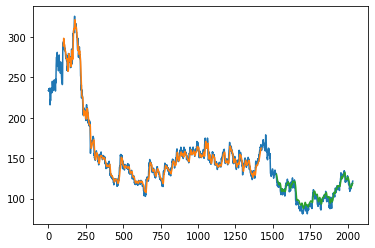

In [102]:
#  Train prediction for plotting
look_back = 100
trainPredictPlot = ny.empty_like(sd1)
trainPredictPlot[:,:] = ny.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Test prediction for plotting
testPredictPlot = ny.empty_like(sd1)
testPredictPlot[:,:] = ny.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(sd1) - 1, :] = test_predict

# Plot baseline and predictions
mat.plot(scaler.inverse_transform(sd1))
mat.plot(trainPredictPlot)
mat.plot(testPredictPlot)
mat.show()

In [103]:
len(test_data), L_test.shape

(611, (510, 100, 1))

In [104]:
L_input = test_data[511:].reshape(1,-1)
L_input.shape

(1, 100)

In [105]:
temp_input = list(L_input)
temp_input = temp_input[0].tolist()

In [106]:
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

Indicate the prediction for next 30 days

In [107]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        L_input=ny.array(temp_input[1:])
        print("{} day input {}".format(i,L_input))
        L_input=L_input.reshape(1,-1)
        L_input = L_input.reshape((1, n_steps, 1))
        yhat = model.predict(L_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        L_input = L_input.reshape((1, n_steps,1))
        yhat = model.predict(L_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15941992]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [108]:
import numpy as np


Assigning the time interval of predictions

In [109]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [110]:
len(sd1)

2035

In [111]:
import matplotlib.pyplot as plt

Orange lines showing the predicctions for next 30 days

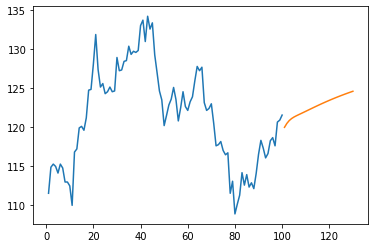

In [116]:
plt.plot(day_new, scaler.inverse_transform(sd1[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

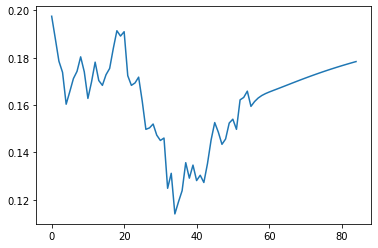

In [117]:
sds=sd1.tolist()
sds.extend(lst_output)
plt.plot(sds[1980:])

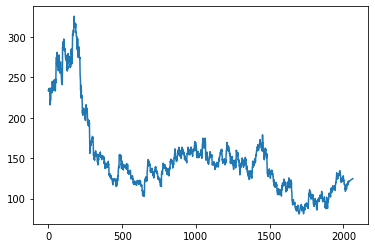

In [118]:

sds=scaler.inverse_transform(sds).tolist()
plt.plot(sds)

# Thank You